In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pulp import *
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil 
import pandas as pd
import networkx as nx

# Functions

### Association Rules Visualization

In [2]:
def assoc_viz(assoc_rules,dr):

    a_rules = assoc_rules

    a_rules = a_rules[a_rules['support']>0.05]

    graph_rules = nx.from_pandas_edgelist(a_rules, source = 'antecedents', target = 'consequents', edge_attr = 'support')

    plt.figure(figsize=(20,8))
    width = a_rules['support'].values*10
    nx.draw_circular(graph_rules, node_size = 10, width=width, with_labels = True)
    plt.savefig(dr+'network.jpg')


D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
def generate_plate(dr,first_gran, df):
    
    #input: filtered transactions
    
    
    food = list(df.loc[0:5,'Group + Cooking Method'])

    data = [x / first_gran.shape[0] for x in list(df.loc[0:5, 'Weight'])]

    # Creating explode data
    explode = (0.1, 0.0, 0.2, 0.0, 0.1, 0.3)

    # Creating color parameters
    colors = ( "Red", "Green", "Blue", 'Cyan', 'Yellow', 'Magenta')

    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d} g)".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                      autopct = lambda pct: func(pct, data),
                                      explode = explode,
                                      labels = food,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="black"))

    # Adding legend
    ax.legend(wedges, food,
              title ="Food",
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    

    # save plot
    plt.savefig(dr+'Average Plate.jpg')
    

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Text Analysis

In [4]:
meal = False
def text_analysis(dr,name,first_gran, df):
    a = first_gran['Household No.'].nunique()
    f = open(dr+'Nutrition Analysis.txt', 'w')
    f.write(f'Location: {name}\n')
    f.write(f'Number of Transactions/Meals: {first_gran.shape[0]} \n')
    f.write(f'Number of Children/Households: {a}')
    f.write('\n \n')
    
    #macros
    
    carbs = float(sum(df['Carbohydrates']))/float(first_gran.shape[0])
    fat = float(sum(df['Fat']))/float(first_gran.shape[0])
    protein = float(sum(df['Protein']))/float(first_gran.shape[0])
    cal = float(sum(df['Calories']))/float(first_gran.shape[0])
    
    L = [f'Carbohydrates: {carbs} \n', f'Fat: {fat} \n', f'Protein: {protein}\n', f'Calories: {cal}']
    
### making pie chart####
    # https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
    
    # Creating dataset
    macros = ['Carbohydrates', 'Fats', 'Protein']

    data = [carbs,fat,protein]


    # Creating explode data
    explode = (0.1, 0.0, 0.2)

    # Creating color parameters
    colors = ( "Red", "Green", "Blue")

    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d} g)".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                      autopct = lambda pct: func(pct, data),
                                      explode = explode,
                                      labels = macros,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="black"))

    # Adding legend
    ax.legend(wedges, macros,
              title ="Macros",
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(f"Total Energy: {cal} kcal per transaction/meal")

    # save plot
    plt.savefig(dr+'Macros Pie Chart per transaction.jpg')
    
###daily##### 
    
    carbs = float(sum(df['Carbohydrates']))/(float(a)*3)
    fat = float(sum(df['Fat']))/float(a*3)
    protein = float(sum(df['Protein']))/float(a*3)
    cal = float(sum(df['Calories']))/float(a*3)
    
    L = [f'Carbohydrates: {carbs} \n', f'Fat: {fat} \n', f'Protein: {protein}\n', f'Calories: {cal}']
    
### making pie chart####
    # https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
    
    # Creating dataset
    macros = ['Carbohydrates', 'Fats', 'Protein']

    data = [carbs,fat,protein]


    # Creating explode data
    explode = (0.1, 0.0, 0.2)

    # Creating color parameters
    colors = ( "Red", "Green", "Blue")

    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d} g)".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                      autopct = lambda pct: func(pct, data),
                                      explode = explode,
                                      labels = macros,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="black"))

    # Adding legend
    ax.legend(wedges, macros,
              title ="Macros",
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(f"Total Energy: {cal} kcal per day")

    # save plot
    if not meal:
        plt.savefig(dr+'Macros Pie Chart per day.jpg')
    
    f.writelines(L)

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Filtered Transactions

In [5]:
def filtered_transactions(dr,df):
    #filtered transactions
    df.to_csv(dr+'filtered transactions.csv')
    a = df
    
    #fill in missing dishes
    for i in range(len(df['Household No.'])):
        if pd.isna(a['Group + Cooking Method'].iloc[i]):
                a['Meal'].iloc[i] = a['Meal'].iloc[i-1]
    
    quants = ["Weight",
    "Calories" ,
    "Protein",
    "Fat",
    "Carbohydrates",
    "Calcium (mg)",
    "Phosphorus (mg)",
    "Iron (mg)",
    "Vitamin A (ug RE)",
    "Thiamin (mg)",
    "Riboflavin (mg)",
    "Niacin (mg NE)",
    "Vitamin C (mg)",]
    
    

    my_a = a.groupby(['Group + Cooking Method'])[quants].sum()
    
    
    
    #Dish frequency analysis 
    
    b = df['Group + Cooking Method'].value_counts().reset_index()
    b.columns = ['Group + Cooking Method', 'Frequency']
    
    pd.merge(b, my_a, on = 'Group + Cooking Method', how = 'left' ).to_csv(dr+'Food Frequency and Quantity.csv')
    
    return pd.merge(b, my_a, on = 'Group + Cooking Method', how = 'left' )

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Dataset with factors/metrics: ComVal

Notes for March 29: 
1. Added Caloric and Macro-Micro Nutrient Adequacy (Columns OB - OU of the Mark Dataset) \
2. Added FGS4, FGS3, and Undernutrition Score from General Database

In [7]:
#dataset with metrics
mark_data_set_comval = pd.read_csv('mark_dataset_edited_comval.csv')


mark_data_set_comval['HHID'] = mark_data_set_comval['HHID'].astype('int').astype('str')
mark_data_set_comval

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HHID,BEN_4PS,AwarenessofSBFP,ParticipationinSBFP,ActualParticipation,AverageMonthlyIncome,WEEKLY_INCOME,TOTAL_EXPENSE_WEEKLY,FOOD_EXPENSE_WEEKLY,NON-FOOD_EXPENSE_WEEKLY,TOTAL_EXPENSE_COMPLETE_WEEKLY,FOOD_EXPENSE_COMPLETE_WEEKLY,NON-FOOD_EXPENSE_COMPLETE_WEEKLY,FOOD_INSECURITY,CLASS_OF_WORKER
0,10001,Yes,1.0,2.0,2.0,3.0,5000.0,6301.2500,1457.50,4843.7500,6321.2500,1477.50,4843.7500,Moderate,3.0
1,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10002,No,3.0,3.0,9.0,2.0,2400.0,2301.9725,1524.58,777.3925,2341.9725,1564.58,777.3925,Moderate,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,91111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1870,91112,No,1.0,2.0,1.0,1.0,750.0,2487.7500,582.00,1905.7500,2537.7500,632.00,1905.7500,Severe,4.0
1871,91112,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1872,91112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#adding per_capita statistics


mark_data_set_comval['WEEKLY_INCOME_per_capita'] = [mark_data_set_comval['WEEKLY_INCOME'][i]/list(mark_data_set_comval['HHID']).count(mark_data_set_comval['HHID'][i]) for i in range(mark_data_set_comval.shape[0])]
mark_data_set_comval['TOTAL_EXPENSE_WEEKLY_per_capita'] = [mark_data_set_comval['TOTAL_EXPENSE_WEEKLY'][i]/list(mark_data_set_comval['HHID']).count(mark_data_set_comval['HHID'][i]) for i in range(mark_data_set_comval.shape[0])]
mark_data_set_comval['FOOD_EXPENSE_WEEKLY_per_capita'] = [mark_data_set_comval['FOOD_EXPENSE_WEEKLY'][i]/list(mark_data_set_comval['HHID']).count(mark_data_set_comval['HHID'][i]) for i in range(mark_data_set_comval.shape[0])]
mark_data_set_comval['NON-FOOD_EXPENSE_WEEKLY_per_capita'] = [mark_data_set_comval['NON-FOOD_EXPENSE_WEEKLY'][i]/list(mark_data_set_comval['HHID']).count(mark_data_set_comval['HHID'][i]) for i in range(mark_data_set_comval.shape[0])]
mark_data_set_comval['TOTAL_EXPENSE_COMPLETE_WEEKLY_per_capita'] = [mark_data_set_comval['TOTAL_EXPENSE_COMPLETE_WEEKLY'][i]/list(mark_data_set_comval['HHID']).count(mark_data_set_comval['HHID'][i]) for i in range(mark_data_set_comval.shape[0])]
mark_data_set_comval['FOOD_EXPENSE_COMPLETE_WEEKLY_per_capita'] = [mark_data_set_comval['FOOD_EXPENSE_COMPLETE_WEEKLY'][i]/list(mark_data_set_comval['HHID']).count(mark_data_set_comval['HHID'][i]) for i in range(mark_data_set_comval.shape[0])]
mark_data_set_comval['NON-FOOD_EXPENSE_COMPLETE_WEEKLY_per_capita'] = [mark_data_set_comval['NON-FOOD_EXPENSE_COMPLETE_WEEKLY'][i]/list(mark_data_set_comval['HHID']).count(mark_data_set_comval['HHID'][i]) for i in range(mark_data_set_comval.shape[0])]

mark_data_set_comval


D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HHID,BEN_4PS,AwarenessofSBFP,ParticipationinSBFP,ActualParticipation,AverageMonthlyIncome,WEEKLY_INCOME,TOTAL_EXPENSE_WEEKLY,FOOD_EXPENSE_WEEKLY,NON-FOOD_EXPENSE_WEEKLY,...,NON-FOOD_EXPENSE_COMPLETE_WEEKLY,FOOD_INSECURITY,CLASS_OF_WORKER,WEEKLY_INCOME_per_capita,TOTAL_EXPENSE_WEEKLY_per_capita,FOOD_EXPENSE_WEEKLY_per_capita,NON-FOOD_EXPENSE_WEEKLY_per_capita,TOTAL_EXPENSE_COMPLETE_WEEKLY_per_capita,FOOD_EXPENSE_COMPLETE_WEEKLY_per_capita,NON-FOOD_EXPENSE_COMPLETE_WEEKLY_per_capita
0,10001,Yes,1.0,2.0,2.0,3.0,5000.0,6301.2500,1457.50,4843.7500,...,4843.7500,Moderate,3.0,1250.0,1575.312500,364.375,1210.937500,1580.312500,369.375,1210.937500
1,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10002,No,3.0,3.0,9.0,2.0,2400.0,2301.9725,1524.58,777.3925,...,777.3925,Moderate,2.0,600.0,575.493125,381.145,194.348125,585.493125,391.145,194.348125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,91111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1870,91112,No,1.0,2.0,1.0,1.0,750.0,2487.7500,582.00,1905.7500,...,1905.7500,Severe,4.0,187.5,621.937500,145.500,476.437500,634.437500,158.000,476.437500
1871,91112,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,...,NaN,NaN,4.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN
1872,91112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#metrics per household
metrics_per_hhd_comval = mark_data_set_comval[mark_data_set_comval['BEN_4PS'].notna()]
metrics_per_hhd_comval

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HHID,BEN_4PS,AwarenessofSBFP,ParticipationinSBFP,ActualParticipation,AverageMonthlyIncome,WEEKLY_INCOME,TOTAL_EXPENSE_WEEKLY,FOOD_EXPENSE_WEEKLY,NON-FOOD_EXPENSE_WEEKLY,...,NON-FOOD_EXPENSE_COMPLETE_WEEKLY,FOOD_INSECURITY,CLASS_OF_WORKER,WEEKLY_INCOME_per_capita,TOTAL_EXPENSE_WEEKLY_per_capita,FOOD_EXPENSE_WEEKLY_per_capita,NON-FOOD_EXPENSE_WEEKLY_per_capita,TOTAL_EXPENSE_COMPLETE_WEEKLY_per_capita,FOOD_EXPENSE_COMPLETE_WEEKLY_per_capita,NON-FOOD_EXPENSE_COMPLETE_WEEKLY_per_capita
0,10001,Yes,1.0,2.0,2.0,3.0,5000.0,6301.2500,1457.50,4843.7500,...,4843.7500,Moderate,3.0,1250.000000,1575.312500,364.375000,1210.937500,1580.312500,369.375000,1210.937500
4,10002,No,3.0,3.0,9.0,2.0,2400.0,2301.9725,1524.58,777.3925,...,777.3925,Moderate,2.0,600.000000,575.493125,381.145000,194.348125,585.493125,391.145000,194.348125
8,10004,No,1.0,2.0,9.0,4.0,3750.0,2368.7500,2250.00,118.7500,...,118.7500,Mild,8.0,1250.000000,789.583333,750.000000,39.583333,852.916667,813.333333,39.583333
11,10005,No,1.0,1.0,9.0,6.0,750.0,6496.2500,2055.00,4441.2500,...,4441.2500,Moderate,1.0,107.142857,928.035714,293.571429,634.464286,956.607143,322.142857,634.464286
18,10006,Yes,1.0,1.0,2.0,2.0,1000.0,6230.5000,2210.00,4020.5000,...,4020.5000,Severe,3.0,250.000000,1557.625000,552.500000,1005.125000,1595.125000,590.000000,1005.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,91108,No,1.0,2.0,1.0,9.0,NaN,7689.2500,4333.00,3356.2500,...,3356.2500,None,NaN,NaN,1098.464286,619.000000,479.464286,1184.178571,704.714286,479.464286
1856,91109,No,1.0,1.0,1.0,7.0,9000.0,4525.0000,1430.00,3095.0000,...,3095.0000,Mild,6.0,1800.000000,905.000000,286.000000,619.000000,955.000000,336.000000,619.000000
1861,91110,No,1.0,2.0,1.0,1.0,1000.0,3291.2500,2508.00,783.2500,...,783.2500,Severe,4.0,250.000000,822.812500,627.000000,195.812500,880.312500,684.500000,195.812500
1865,91111,No,1.0,2.0,1.0,4.0,9500.0,18517.5000,3180.00,15337.5000,...,15337.5000,Moderate,3.0,1900.000000,3703.500000,636.000000,3067.500000,3753.500000,686.000000,3067.500000


In [10]:
### Incorporating general database nonbinary (comval)

#gen_data = pd.read_csv('general_database_comval_nonbinary.csv')

gen_data = pd.read_csv('general_database_comval.csv')

gen_data['IDNumber'] = gen_data['IDNumber'].astype('str')
# Adding Macro-micro nutrient adequacy 

metrics_per_hhd_comval = pd.merge(metrics_per_hhd_comval,gen_data,left_on='HHID', right_on='IDNumber',how='left')


D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
#Fixing data types /converting to string binary

#Converting to Binary
cols_1 = metrics_per_hhd_comval.columns[metrics_per_hhd_comval.columns.get_loc("AwarenessofSBFP"): metrics_per_hhd_comval.columns.get_loc("AverageMonthlyIncome")+1]
cols_1
cols_2 = metrics_per_hhd_comval.columns[metrics_per_hhd_comval.columns.get_loc("Location_"): metrics_per_hhd_comval.columns.get_loc("_Undernutrition Score")+1]
cols_2
my_cols = list(cols_1) + list(cols_2)
my_cols

for col in my_cols:
    metrics_per_hhd_comval[col] = metrics_per_hhd_comval[col].astype('Int64').astype(str)
metrics_per_hhd_comval

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HHID,BEN_4PS,AwarenessofSBFP,ParticipationinSBFP,ActualParticipation,AverageMonthlyIncome,WEEKLY_INCOME,TOTAL_EXPENSE_WEEKLY,FOOD_EXPENSE_WEEKLY,NON-FOOD_EXPENSE_WEEKLY,...,_Phosphorus Adequacy,_Iron Adequacy,_Vitamin A Adequacy,_Thiamin Adequacy,_Riboflavin Adequacy,_Niacin Adequacy,_Vitamin C Adequacy,FBS4,FBS3,_Undernutrition Score
0,10001,Yes,1,2,2,3,5000.0,6301.2500,1457.50,4843.7500,...,0,0,0,0,0,1,0,0,0,1
1,10002,No,3,3,9,2,2400.0,2301.9725,1524.58,777.3925,...,0,0,0,0,0,1,0,0,1,1
2,10004,No,1,2,9,4,3750.0,2368.7500,2250.00,118.7500,...,0,0,0,0,0,1,1,0,0,1
3,10005,No,1,1,9,6,750.0,6496.2500,2055.00,4441.2500,...,0,0,0,0,0,1,0,0,0,1
4,10006,Yes,1,1,2,2,1000.0,6230.5000,2210.00,4020.5000,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,91108,No,1,2,1,9,NaN,7689.2500,4333.00,3356.2500,...,0,0,1,0,0,0,0,0,0,1
331,91109,No,1,1,1,7,9000.0,4525.0000,1430.00,3095.0000,...,0,0,1,0,0,1,1,0,1,1
332,91110,No,1,2,1,1,1000.0,3291.2500,2508.00,783.2500,...,0,0,0,0,0,1,0,0,0,1
333,91111,No,1,2,1,4,9500.0,18517.5000,3180.00,15337.5000,...,0,0,0,0,0,0,0,0,1,1


In [12]:
metrics_per_hhd_comval.columns

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['HHID', 'BEN_4PS', 'AwarenessofSBFP', 'ParticipationinSBFP',
       'ActualParticipation', 'AverageMonthlyIncome', 'WEEKLY_INCOME',
       'TOTAL_EXPENSE_WEEKLY', 'FOOD_EXPENSE_WEEKLY',
       'NON-FOOD_EXPENSE_WEEKLY', 'TOTAL_EXPENSE_COMPLETE_WEEKLY',
       'FOOD_EXPENSE_COMPLETE_WEEKLY', 'NON-FOOD_EXPENSE_COMPLETE_WEEKLY',
       'FOOD_INSECURITY', 'CLASS_OF_WORKER', 'WEEKLY_INCOME_per_capita',
       'TOTAL_EXPENSE_WEEKLY_per_capita', 'FOOD_EXPENSE_WEEKLY_per_capita',
       'NON-FOOD_EXPENSE_WEEKLY_per_capita',
       'TOTAL_EXPENSE_COMPLETE_WEEKLY_per_capita',
       'FOOD_EXPENSE_COMPLETE_WEEKLY_per_capita',
       'NON-FOOD_EXPENSE_COMPLETE_WEEKLY_per_capita', 'IDNumber', 'Location_',
       'Feeding Program', 'AgeGroup_', 'GenderParent_', 'EducParent_',
       'WorkStatus_', 'MaritalStatus_', 'HHDD_', 'F_Insecurity',
       'F_Insecurity_2', '_Energy Adequacy', '_Protein Adequacy',
       '_Calcium Adequacy', '_Phosphorus Adequacy', '_Iron Adequacy',
       '_Vitamin A 

### Dataset with factors/metrics: Valenzuela

Notes for March 29: 
1. Add Caloric and Macro-Micro Nutrient Adequacy (Columns AEF - AEO of the Mark Dataset) \
2. Add FGS4, FGS3, and Undernutrition Score from General Database

In [13]:
#dataset with metrics
mark_data_set_val = pd.read_csv('mark_dataset_edited_val.csv')


mark_data_set_val['HHID'] = mark_data_set_val['HHID'].astype('int').astype('str')
mark_data_set_val

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HHID,BEN_4PS,FOOD_EXPENSE_WEEKLY,NON-FOOD_EXPENSE_WEEKLY,Total_Expenditure,Per_Capita_Expenditure,Per_Capita_Food_Expenditure,FOOD_INSECURITY
0,11002,No,2211.624946,3746.22400,5957.848946,1191.569789,442.324989,Moderate
1,11002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1566,24918,No,833.829375,2890.00000,3723.829375,1241.276458,277.943125,Severe
1567,99991,No,1312.526792,629.10375,1941.630542,485.407635,328.131698,Moderate
1568,99991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1569,99991,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
metrics_per_hhd_val = mark_data_set_val[mark_data_set_val['BEN_4PS'].notna()]
metrics_per_hhd_val

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HHID,BEN_4PS,FOOD_EXPENSE_WEEKLY,NON-FOOD_EXPENSE_WEEKLY,Total_Expenditure,Per_Capita_Expenditure,Per_Capita_Food_Expenditure,FOOD_INSECURITY
0,11002,No,2211.624946,3746.22400,5957.848946,1191.569789,442.324989,Moderate
5,11005,Yes,890.935958,1313.25000,2204.185958,367.364326,148.489326,Severe
11,11006,Yes,2614.001799,356.03221,2970.034009,495.005668,435.666966,None
15,11016,No,1608.328694,1246.25000,2854.578694,475.763116,268.054782,None
21,11023,No,1013.682135,6180.00000,7193.682135,1027.668876,144.811734,Moderate
...,...,...,...,...,...,...,...,...
1553,24894,No,1393.937269,2082.50000,3476.437269,869.109317,348.484317,None
1557,24903,No,914.625056,2122.92125,3037.546306,759.386577,228.656264,None
1561,24911,No,3063.283888,4615.00000,7678.283888,1535.656778,612.656778,None
1566,24918,No,833.829375,2890.00000,3723.829375,1241.276458,277.943125,Severe


In [15]:
### Incorporating caloric/micro/macro nutrient adqueacies

val_nutr = pd.read_csv('valenzuela_calories_nutrients.csv')

val_nutr['HHID'] = val_nutr['HHID'].astype('int').astype('str')
# Adding Macro-micro nutrient adequacy 

val_nutr = val_nutr[val_nutr['ENERGY_%_ADEQ_ALL'].notna()]


metrics_per_hhd_val = pd.merge(metrics_per_hhd_val,val_nutr,left_on='HHID', right_on='HHID',how='left')
metrics_per_hhd_val

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HHID,BEN_4PS,FOOD_EXPENSE_WEEKLY,NON-FOOD_EXPENSE_WEEKLY,Total_Expenditure,Per_Capita_Expenditure,Per_Capita_Food_Expenditure,FOOD_INSECURITY,ENERGY_%_ADEQ_ALL,PROTEIN_%_ADEQ_ALL,CALCIUM_%_ADEQ_ALL,PHOSPHORUS_%_ADEQ_ALL,IRON_%_ADEQ_ALL,VIT_A_%_ADEQ_ALL,THIAMIN_%_ADEQ_ALL,RIBOFLAVIN_%_ADEQ_ALL,NIACIN_%_ADEQ_ALL,VIT_C_%_ADEQ_ALL
0,11002,No,2211.624946,3746.22400,5957.848946,1191.569789,442.324989,Moderate,84.500000,118.610000,61.120000,70.87000,67.810000,399.460000,121.67,187.950000,218.000000,58.580000
1,11005,Yes,890.935958,1313.25000,2204.185958,367.364326,148.489326,Severe,114.760000,318.410000,77.760000,151.79000,106.220000,178.790000,126.20,246.810000,205.560000,490.510000
2,11006,Yes,2614.001799,356.03221,2970.034009,495.005668,435.666966,None,89.572917,172.638889,22.310606,77.81893,50.968992,35.971223,92.50,64.444444,261.380952,32.275362
3,11016,No,1608.328694,1246.25000,2854.578694,475.763116,268.054782,None,100.290000,143.890000,128.260000,160.49000,81.620000,63.380000,68.67,191.330000,150.480000,81.820000
4,11023,No,1013.682135,6180.00000,7193.682135,1027.668876,144.811734,Moderate,63.360000,158.750000,50.530000,104.28000,108.550000,170.200000,94.00,145.330000,214.290000,77.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,24894,No,1393.937269,2082.50000,3476.437269,869.109317,348.484317,None,211.380000,396.780000,195.450000,327.57000,191.860000,116.190000,213.33,233.890000,535.710000,43.480000
312,24903,No,914.625056,2122.92125,3037.546306,759.386577,228.656264,None,156.040000,276.530000,180.380000,275.72000,162.020000,170.980000,157.22,241.670000,356.190000,15.940000
313,24911,No,3063.283888,4615.00000,7678.283888,1535.656778,612.656778,None,79.940000,175.140000,68.410000,122.47000,72.090000,42.450000,32.22,76.110000,226.190000,24.640000
314,24918,No,833.829375,2890.00000,3723.829375,1241.276458,277.943125,Severe,98.980000,132.860000,98.790000,66.19000,97.390000,125.730000,134.76,110.000000,213.700000,71.720000


In [16]:
#Converting to Binary
adeq_cols = metrics_per_hhd_val.columns[metrics_per_hhd_val.columns.get_loc('ENERGY_%_ADEQ_ALL'):metrics_per_hhd_val.columns.get_loc('VIT_C_%_ADEQ_ALL')+1]
for col in adeq_cols:
    metrics_per_hhd_val.loc[metrics_per_hhd_val[col]>=100, col] = '1'
    metrics_per_hhd_val.loc[~(metrics_per_hhd_val[col]=='1'),col] = '0'
metrics_per_hhd_val

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HHID,BEN_4PS,FOOD_EXPENSE_WEEKLY,NON-FOOD_EXPENSE_WEEKLY,Total_Expenditure,Per_Capita_Expenditure,Per_Capita_Food_Expenditure,FOOD_INSECURITY,ENERGY_%_ADEQ_ALL,PROTEIN_%_ADEQ_ALL,CALCIUM_%_ADEQ_ALL,PHOSPHORUS_%_ADEQ_ALL,IRON_%_ADEQ_ALL,VIT_A_%_ADEQ_ALL,THIAMIN_%_ADEQ_ALL,RIBOFLAVIN_%_ADEQ_ALL,NIACIN_%_ADEQ_ALL,VIT_C_%_ADEQ_ALL
0,11002,No,2211.624946,3746.22400,5957.848946,1191.569789,442.324989,Moderate,0,1,0,0,0,1,1,1,1,0
1,11005,Yes,890.935958,1313.25000,2204.185958,367.364326,148.489326,Severe,1,1,0,1,1,1,1,1,1,1
2,11006,Yes,2614.001799,356.03221,2970.034009,495.005668,435.666966,None,0,1,0,0,0,0,0,0,1,0
3,11016,No,1608.328694,1246.25000,2854.578694,475.763116,268.054782,None,1,1,1,1,0,0,0,1,1,0
4,11023,No,1013.682135,6180.00000,7193.682135,1027.668876,144.811734,Moderate,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,24894,No,1393.937269,2082.50000,3476.437269,869.109317,348.484317,None,1,1,1,1,1,1,1,1,1,0
312,24903,No,914.625056,2122.92125,3037.546306,759.386577,228.656264,None,1,1,1,1,1,1,1,1,1,0
313,24911,No,3063.283888,4615.00000,7678.283888,1535.656778,612.656778,None,0,1,0,1,0,0,0,0,1,0
314,24918,No,833.829375,2890.00000,3723.829375,1241.276458,277.943125,Severe,0,1,0,0,0,1,1,1,1,0


In [17]:
#renaming columns 

metrics_per_hhd_val = metrics_per_hhd_val.rename(columns={'ENERGY_%_ADEQ_ALL': 'energy_adeq', 
                                                          'PROTEIN_%_ADEQ_ALL': 'protein_adeq',
                                                         'CALCIUM_%_ADEQ_ALL': 'calcium_adeq', 
                                                          'PHOSPHORUS_%_ADEQ_ALL': 'phosphorus_adeq',
                                                         'IRON_%_ADEQ_ALL': 'iron_adeq', 
                                                          'VIT_A_%_ADEQ_ALL': 'vit_a_adeq',
                                                         'THIAMIN_%_ADEQ_ALL': 'THIAMIN_adeq', 
                                                          'RIBOFLAVIN_%_ADEQ_ALL': 'RIBOFLAVIN_adeq',
                                                         'NIACIN_%_ADEQ_ALL': 'NIACIN_adeq', 
                                                          'VIT_C_%_ADEQ_ALL': 'VIT_C_adeq'})
metrics_per_hhd_val

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HHID,BEN_4PS,FOOD_EXPENSE_WEEKLY,NON-FOOD_EXPENSE_WEEKLY,Total_Expenditure,Per_Capita_Expenditure,Per_Capita_Food_Expenditure,FOOD_INSECURITY,energy_adeq,protein_adeq,calcium_adeq,phosphorus_adeq,iron_adeq,vit_a_adeq,THIAMIN_adeq,RIBOFLAVIN_adeq,NIACIN_adeq,VIT_C_adeq
0,11002,No,2211.624946,3746.22400,5957.848946,1191.569789,442.324989,Moderate,0,1,0,0,0,1,1,1,1,0
1,11005,Yes,890.935958,1313.25000,2204.185958,367.364326,148.489326,Severe,1,1,0,1,1,1,1,1,1,1
2,11006,Yes,2614.001799,356.03221,2970.034009,495.005668,435.666966,None,0,1,0,0,0,0,0,0,1,0
3,11016,No,1608.328694,1246.25000,2854.578694,475.763116,268.054782,None,1,1,1,1,0,0,0,1,1,0
4,11023,No,1013.682135,6180.00000,7193.682135,1027.668876,144.811734,Moderate,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,24894,No,1393.937269,2082.50000,3476.437269,869.109317,348.484317,None,1,1,1,1,1,1,1,1,1,0
312,24903,No,914.625056,2122.92125,3037.546306,759.386577,228.656264,None,1,1,1,1,1,1,1,1,1,0
313,24911,No,3063.283888,4615.00000,7678.283888,1535.656778,612.656778,None,0,1,0,1,0,0,0,0,1,0
314,24918,No,833.829375,2890.00000,3723.829375,1241.276458,277.943125,Severe,0,1,0,0,0,1,1,1,1,0


# Main Function

### Adding gaps

In [18]:
#valenzuela dataset
df_val = pd.read_csv('final-valenzuela-dataset.csv', encoding = 'latin-1')
for i in range(len(df_val['Household No.'])):
    #Fill up missing values
        if pd.isna(df_val['Household No.'].iloc[i]):
            df_val['Household No.'].iloc[i] = df_val['Household No.'].iloc[i-1]

        if pd.isna(df_val['HHLD Visit'].iloc[i]):
            df_val['HHLD Visit'].iloc[i] = df_val['HHLD Visit'].iloc[i-1]

        if pd.isna(df_val['Meal'].iloc[i]):
            df_val['Meal'].iloc[i] = df_val['Meal'].iloc[i-1]
            
        if pd.isna(df_val['Sex of Child'].iloc[i]):
            df_val['Sex of Child'].iloc[i] = df_val['Sex of Child'].iloc[i-1]
            
        if pd.isna(df_val['Age'].iloc[i]):
            df_val['Age'].iloc[i] = df_val['Age'].iloc[i-1]

df_val = df_val[df_val['Weight'] != '-']
#comval dataset
            
df_comval = pd.read_csv('final-comval-dataset.csv', encoding = 'latin-1')

df_comval = df_comval.rename(columns={'Household No. ': 'Household No.'}) #fixing column name

for i in range(len(df_comval['Household No.'])):
    #Fill up missing values
        if pd.isna(df_comval['Household No.'].iloc[i]):
            df_comval['Household No.'].iloc[i] = df_comval['Household No.'].iloc[i-1]

        if pd.isna(df_comval['HHLD Visit'].iloc[i]):
            df_comval['HHLD Visit'].iloc[i] = df_comval['HHLD Visit'].iloc[i-1]

        if pd.isna(df_comval['Meal'].iloc[i]):
            df_comval['Meal'].iloc[i] = df_comval['Meal'].iloc[i-1]
            
        if pd.isna(df_comval['Sex of Child'].iloc[i]):
            df_comval['Sex of Child'].iloc[i] = df_comval['Sex of Child'].iloc[i-1]
        
        if pd.isna(df_comval['Age'].iloc[i]):
            df_comval['Age'].iloc[i] = df_comval['Age'].iloc[i-1]
df_comval.to_csv('Comval main dataset check.csv')

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
D:\Anacona\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
df_val['Carbohydrates'] = df_val['Carbohydrates'].fillna(0)
df_val['Carbohydrates'] = df_val['Carbohydrates'].astype(float)

df_val['Protein'] = df_val['Protein'].fillna(0)
df_val['Protein'] = df_val['Protein'].astype(float)

df_val['Fat'] = df_val['Fat'].fillna(0)
df_val['Fat'] = df_val['Fat'].astype(float)

df_val['Calories'] = df_val['Calories'].fillna(0)
df_val['Calories'] = df_val['Calories'].astype(float)

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
def fix_macros_of_comval():
    df_comval['Carbohydrates'] = df_comval['Carbohydrates'].fillna(0)
    df_comval['Carbohydrates'] = df_comval['Carbohydrates'].astype(float)

    df_comval['Protein'] = df_comval['Protein'].fillna(0)
    df_comval['Protein'] = df_comval['Protein'].astype(float)

    df_comval['Fat'] = df_comval['Fat'].fillna(0)
    df_comval['Fat'] = df_comval['Fat'].astype(float)

    df_comval['Calories'] = df_comval['Calories'].fillna(0)
    df_comval['Calories'] = df_comval['Calories'].astype(float)
    
    df_comval['Weight'] = df_comval['Weight'].fillna(0)
    df_comval['Weight'] = df_comval['Weight'].astype(float)


fix_macros_of_comval()

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#fixing weights

df_val['Weight'] = df_val['Weight'].astype(float)
df_val['Weight'] = df_val['Weight'].fillna(0)

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Function that outputs files

In [22]:
#current path
path = 'D:/Thesis/mar 29/'

def f(name, meal='', sex='', age='', cumu_down=False, cumu_up = False, **filters):
    
    file_name = name
    
    str_columns = []
    
    #Setting up directory path
    
    if name == 'comval':
        df = df_comval
        dr = path + 'comval/'
        
    elif name == 'valenzuela':
        df = df_val
        dr = path + 'valenzuela/'

    
    #left_joining metrics
    df['Household No.'] = df['Household No.'].astype('int').astype('str')
    
    if name == 'comval':
        df = pd.merge(df,metrics_per_hhd_comval,left_on='Household No.', right_on='HHID',how='left')
        str_columns = ['BEN_4PS', 'FOOD_INSECURITY'] + metrics_per_hhd_comval.columns[metrics_per_hhd_comval.columns.get_loc('Location_'):metrics_per_hhd_comval.columns.get_loc('_Undernutrition Score')+1].tolist()
        
    elif name == 'valenzuela':
        df = pd.merge(df,metrics_per_hhd_val,left_on='Household No.', right_on='HHID',how='left')
        str_columns = ["BEN_4PS","FOOD_INSECURITY","energy_adeq","protein_adeq","calcium_adeq","phosphorus_adeq",
                        "iron_adeq","vit_a_adeq","THIAMIN_adeq","RIBOFLAVIN_adeq","NIACIN_adeq","VIT_C_adeq"]
    
    
   
    
    #FILTERS (only works for single inputs)
    if meal:
        m = meal[0]
        df = df[df['Meal'].str.startswith(m[0])]
        file_name = file_name + str(meal)
        dr = f'{dr}{str(meal)}/'
        if not os.path.exists(dr):
            os.mkdir(dr)
        
        
    if sex: 
        s = sex[0]
        df = df[df['Sex of Child'].str.startswith(s[0])]
        file_name = file_name + sex 
    if age:
        df = df[df['Age'].isin(age)]
        file_name = file_name + str(age) 
        
        

        
    #FILTERS based on metrics
    
    for feat, value in filters.items():
        if feat in str_columns:
            df = df[df[feat].isin(value)]
            file_name = file_name + str(f'{feat} {value}')
        else:
            if cumu_down:
                df = df[df[feat]<=value]
                file_name = file_name + str(f'{feat} {value}') + 'cumu_down'
            elif cumu_up:
                df = df[df[feat] >= value]
                file_name = file_name + str(f'{feat} {value}') + 'cumu_up'
            else:
                df = df[df[feat]==value]
                file_name = file_name + str(f'{feat} {value}')       
    
    dr = f'{dr}{file_name}/'
    if os.path.exists(dr):
        shutil.rmtree(dr)
    os.mkdir(dr)
    
    # generating dish frequency and filtered transactions
    filtered_transactions(dr,df)
    
    #market basket analysis code inspired by: #https://medium.com/@jihargifari/how-to-perform-market-basket-analysis-in-python-bd00b745b106
    
    # converting filtered transactions into granular transactions
    first_gran = df.groupby(['Household No.', 'HHLD Visit', 'Meal'])['Group + Cooking Method'].apply(list).reset_index(name='Dish List')
    
    first_gran.to_csv(dr+'firstgran.csv')
    # making transaction table 
    
    trans_df = pd.DataFrame()

    trans_df['Transaction Code'] = first_gran['Household No.'].astype(str) +'_'+ first_gran['HHLD Visit'].astype(str) +'_'+ first_gran['Meal'].astype(str) 
    trans_df['Dish List'] = first_gran['Dish List']
    
    # unique list of dishes
    unique_dishes = list(df['Group + Cooking Method'].unique())
    
    mba_df = pd.DataFrame()

    mba_df['Transaction Code'] = trans_df['Transaction Code']
    for dish in unique_dishes:
        mba_df[dish] = dish
       
    #make all values zero temporarily
    for col in mba_df.columns:
        mba_df[col].values[:] = 0
        
    mba_df['Transaction Code'] = trans_df['Transaction Code']
    
    #make value 1 if dish is in the transaction
    for i in range(len(trans_df['Transaction Code'])):
        for dish in trans_df.iloc[i,1]:
            mba_df.iloc[i,mba_df.columns.get_loc(dish)]=1
            
    mba_df = mba_df.loc[:, mba_df.columns.notna()]
    
    
    frequent_itemsets_plus = apriori(mba_df.loc[:, mba_df.columns != 'Transaction Code'], min_support=0.01, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

    frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))
    
    #original itemsets
    a = frequent_itemsets_plus.copy()
    
    #removing "frozenset"
    a['itemsets'] = a['itemsets'].astype(str).str[10:].str[:-1]
    
    
    a.to_csv(dr+'Frequent Itemsets Dishes.csv')
    
    assoc_rules = association_rules(frequent_itemsets_plus, metric='lift', min_threshold=1).sort_values('support', ascending=False).reset_index(drop=True)
    
    assoc_rules['antecedents'] = assoc_rules['antecedents'].astype(str).str[10:].str[:-1]
    assoc_rules['consequents'] = assoc_rules['consequents'].astype(str).str[10:].str[:-1]
    
    assoc_rules.to_csv(dr+'Association Rules.csv')
    
    
    
    #visualization
    assoc_viz(assoc_rules,dr)
    
    #text analysis
    
    text_analysis(dr,name,first_gran,df)
    
    #Generate plate 
    
    generate_plate(dr ,first_gran, filtered_transactions(dr,df))

    
    

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# All Filters (Function Call for Valenzuela)

In [ ]:
names = ['valenzuela']
meals = [['Breakfast'], ['Lunch'], ['Dinner'], ['Snack']]
meal = True

In [ ]:
for name in names:
    for meal in meals:
        f(name=name, meal=meal) 

In [ ]:
#ALL POSSIBLE FILTERS 

#4Ps

for name in names:
    for meal in meals:
        f(name=name, meal=meal, BEN_4PS = ['Yes'])     
for name in names:
    for meal in meals:
        f(name=name, meal=meal, BEN_4PS = ['No'])
        


In [ ]:
# Total Expense Weekly

metrics_per_hhd_val['Total_Expenditure'].mean()

for name in names:
    for meal in meals:
        f(name=name, meal=meal, Total_Expenditure = metrics_per_hhd_val['Total_Expenditure'].mean(), cumu_down=True)     
for name in names:
    for meal in meals:
        f(name=name, meal=meal, Total_Expenditure = metrics_per_hhd_val['Total_Expenditure'].mean(), cumu_up=True)


In [ ]:
metrics_per_hhd_val['FOOD_EXPENSE_WEEKLY'].mean()

In [ ]:
# Food expense weekly

metrics_per_hhd_val['FOOD_EXPENSE_WEEKLY'].mean()

for name in names:
    for meal in meals:
        f(name=name, meal=meal, FOOD_EXPENSE_WEEKLY = metrics_per_hhd_val['FOOD_EXPENSE_WEEKLY'].mean(), cumu_down=True)     
for name in names:
    for meal in meals:
        f(name=name, meal=meal, FOOD_EXPENSE_WEEKLY = metrics_per_hhd_val['FOOD_EXPENSE_WEEKLY'].mean(), cumu_up=True)

In [ ]:
# Sex
sexes = ['Male', 'Female']
for name in names: 
    for meal in meals: 
        for s in sexes:
            f(name=name, meal=meal, sex=s)

In [ ]:
# Food Insecurity
food_s_vals = list(metrics_per_hhd_val["FOOD_INSECURITY"].unique())
food_s_vals = food_s_vals[0:4]


for name in names: 
    for meal in meals: 
        for s in food_s_vals:
            f(name=name, meal=meal, FOOD_INSECURITY = [s])

In [ ]:
# Nutrient Inadequacies

cols = metrics_per_hhd_val.columns[metrics_per_hhd_val.columns.get_loc('energy_adeq'):metrics_per_hhd_val.columns.get_loc('VIT_C_adeq')+1].tolist()

for name in names: 
    for meal in meals:
        for col in cols:
            for i in range(2):
                mapping = {col:[str(i)]}
                f(name=name, meal=meal, **mapping)
                
    

# ComVal function calls

Filters to use: 
BEN_4PS	\
WEEKLY_INCOME \
FOOD_EXPENSE_WEEKLY \
TOTAL_EXPENSE_WEEKLY \
FOOD_INSECURITY \
Feeding Program	\
HHDD_ \
F_Insecurity \	
F_Insecurity_2 \	
_Energy Adequacy \
_Protein Adequacy \	
_Calcium Adequacy \
_Phosphorus Adequacy \
_Iron Adequacy	\
_Vitamin A Adequacy \	
_Thiamin Adequacy	\
_Riboflavin Adequacy \	
_Niacin Adequacy	\
_Vitamin C Adequacy	\
FBS4	\
FBS3	\
_Undernutrition Score \

In [24]:
names = ['comval']
meals = [['Breakfast'], ['Lunch'], ['Dinner'], ['Snack']]
meal = True

D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\Anacona\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
D:\Anacona\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
D:\Anacona\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
D:\Anacona\lib\site-packages\mlxtend\frequent_pat

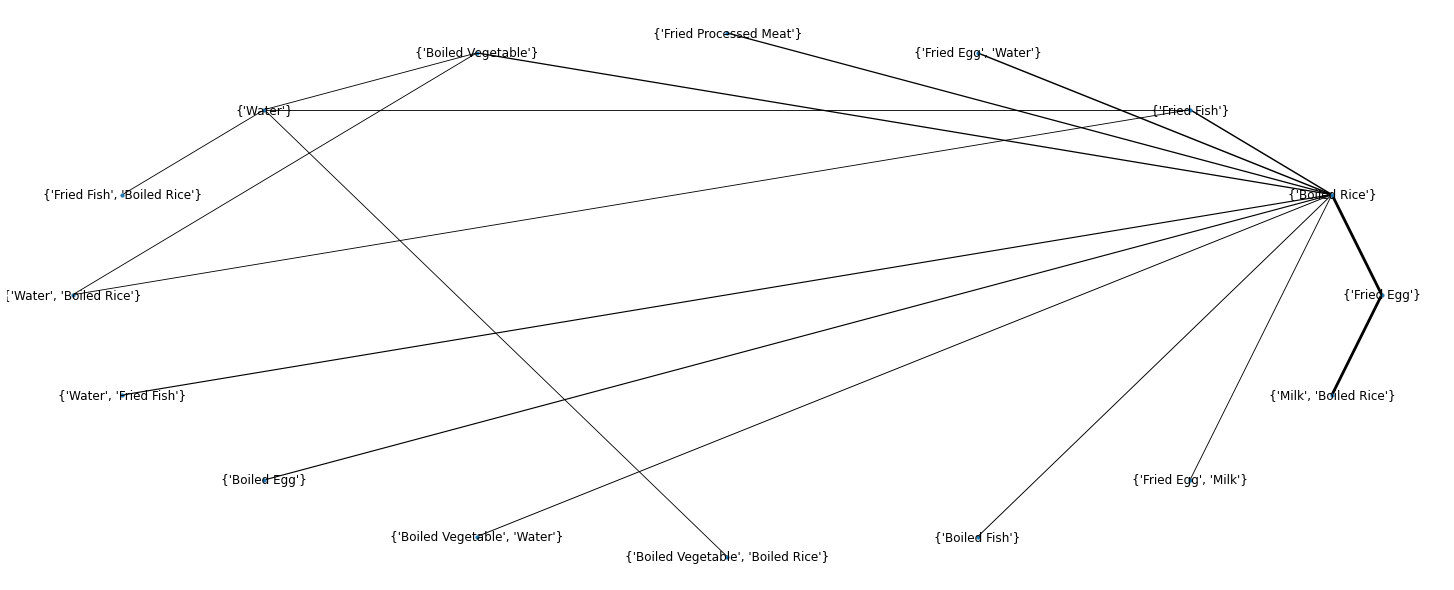

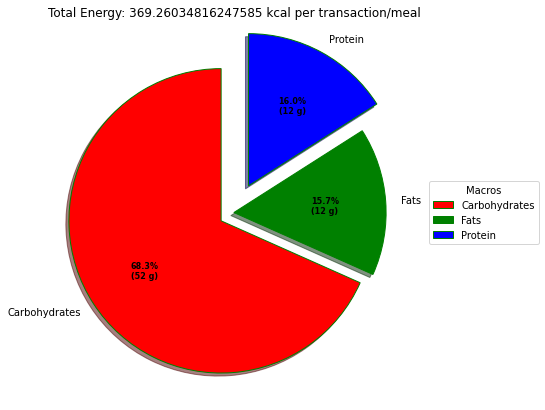

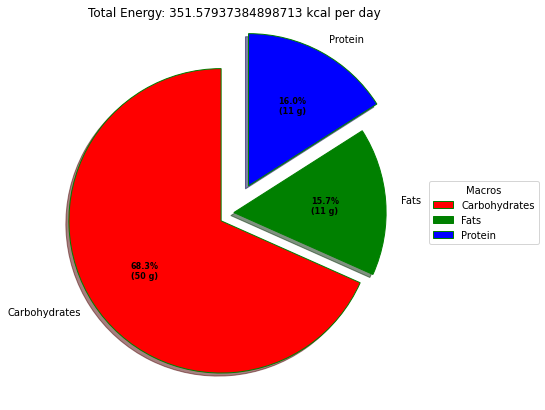

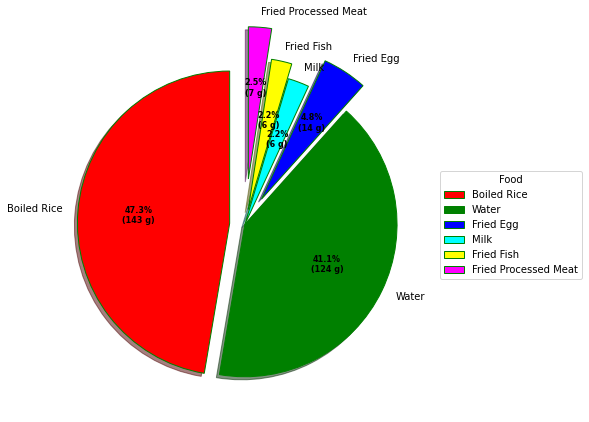

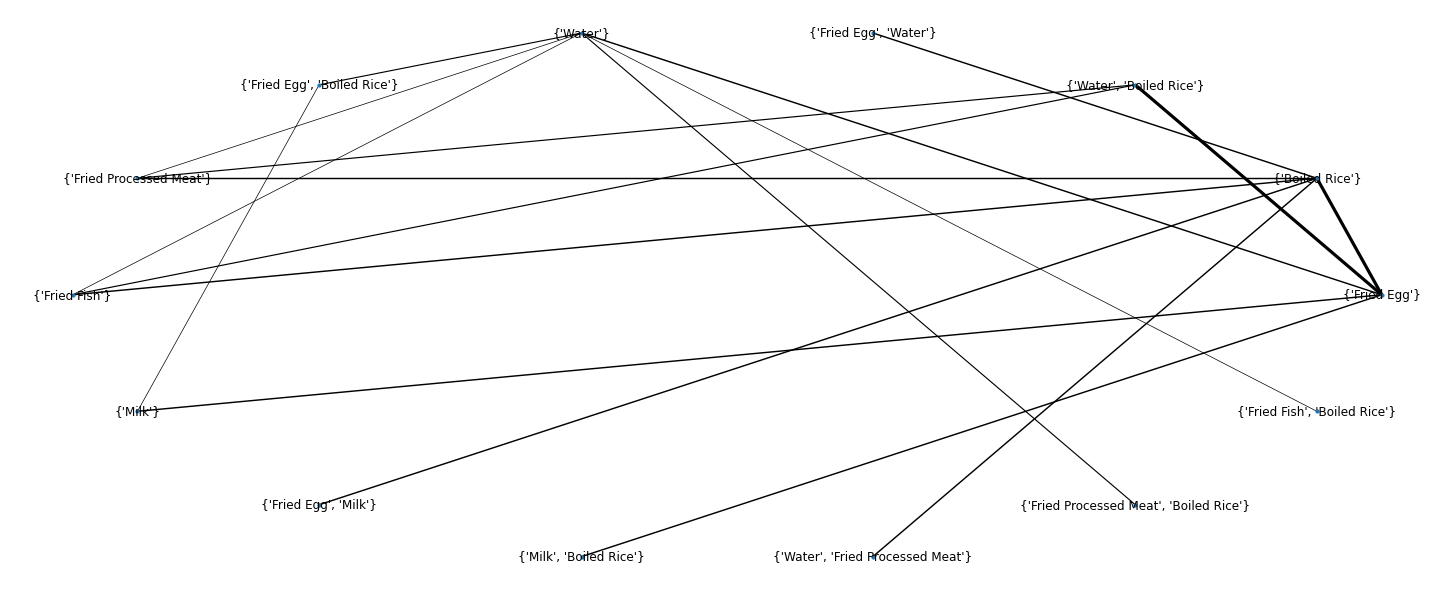

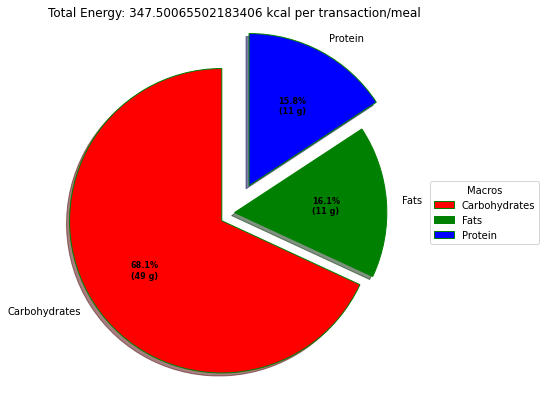

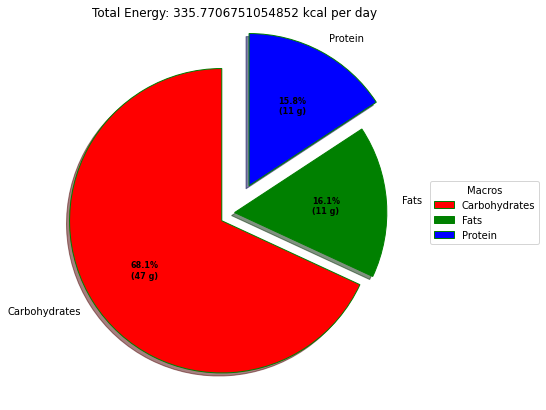

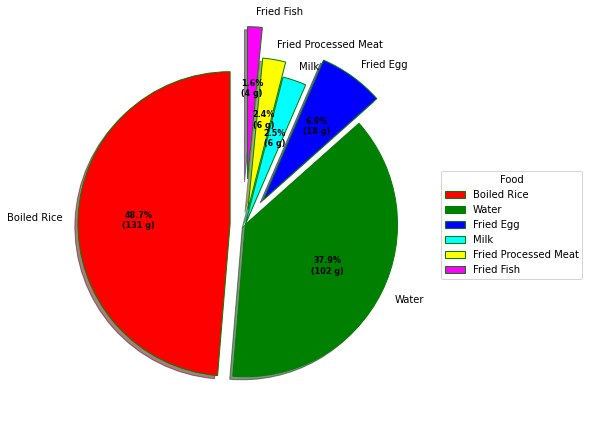

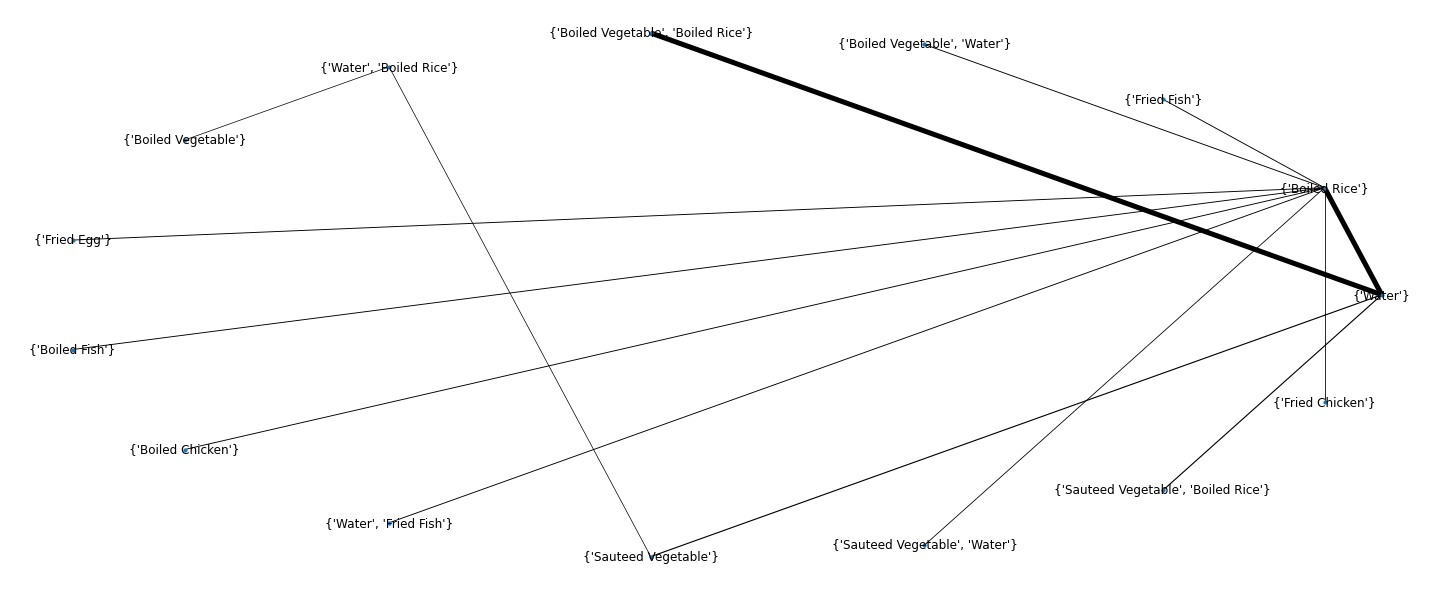

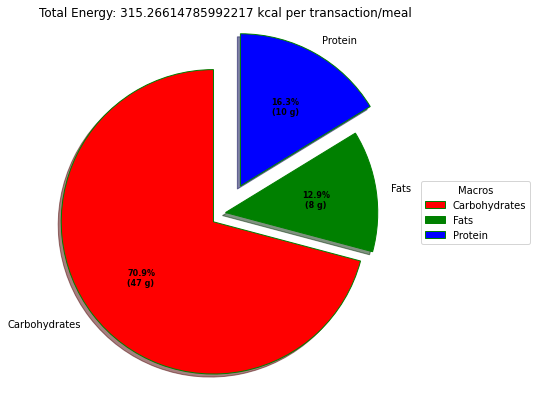

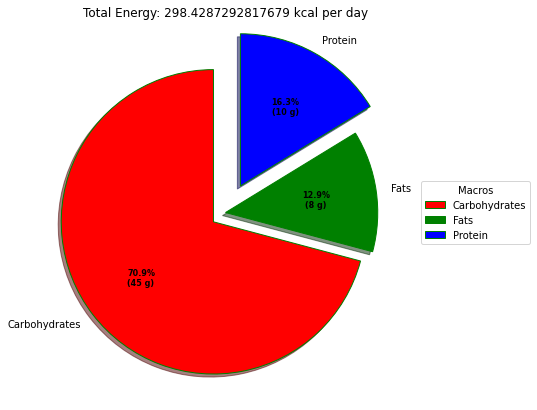

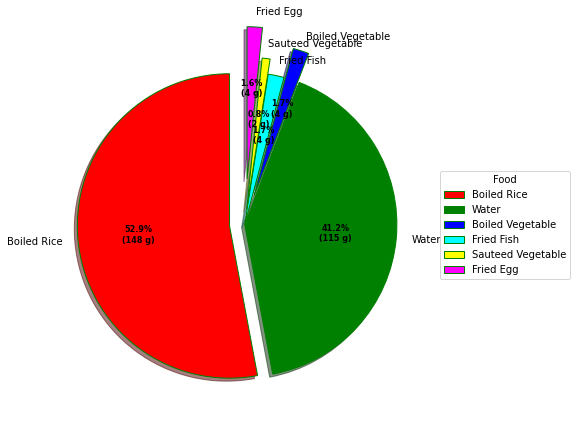

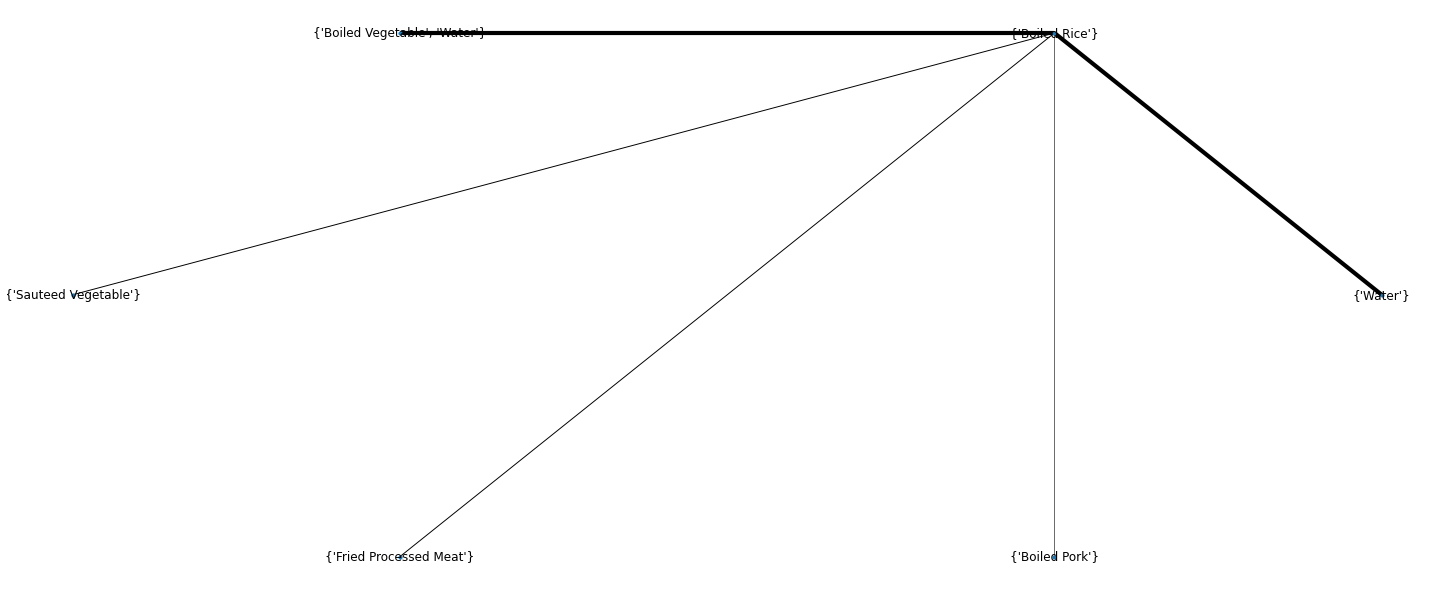

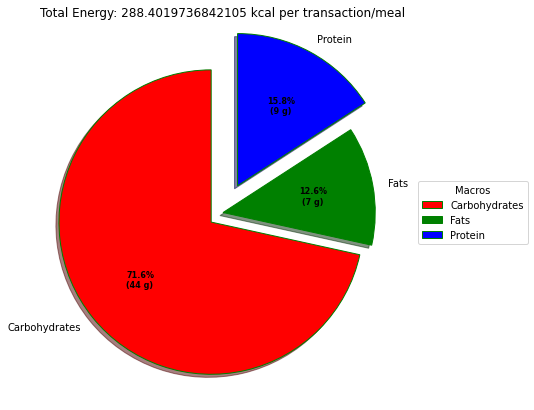

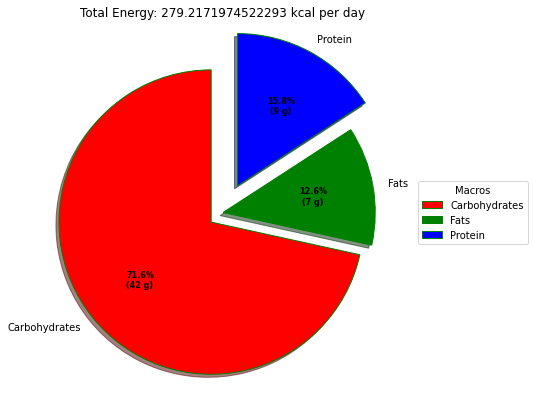

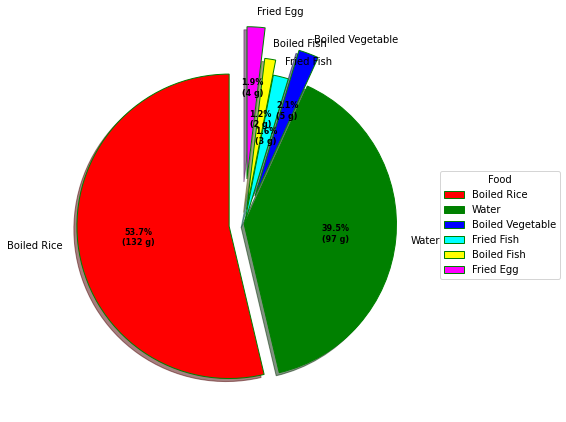

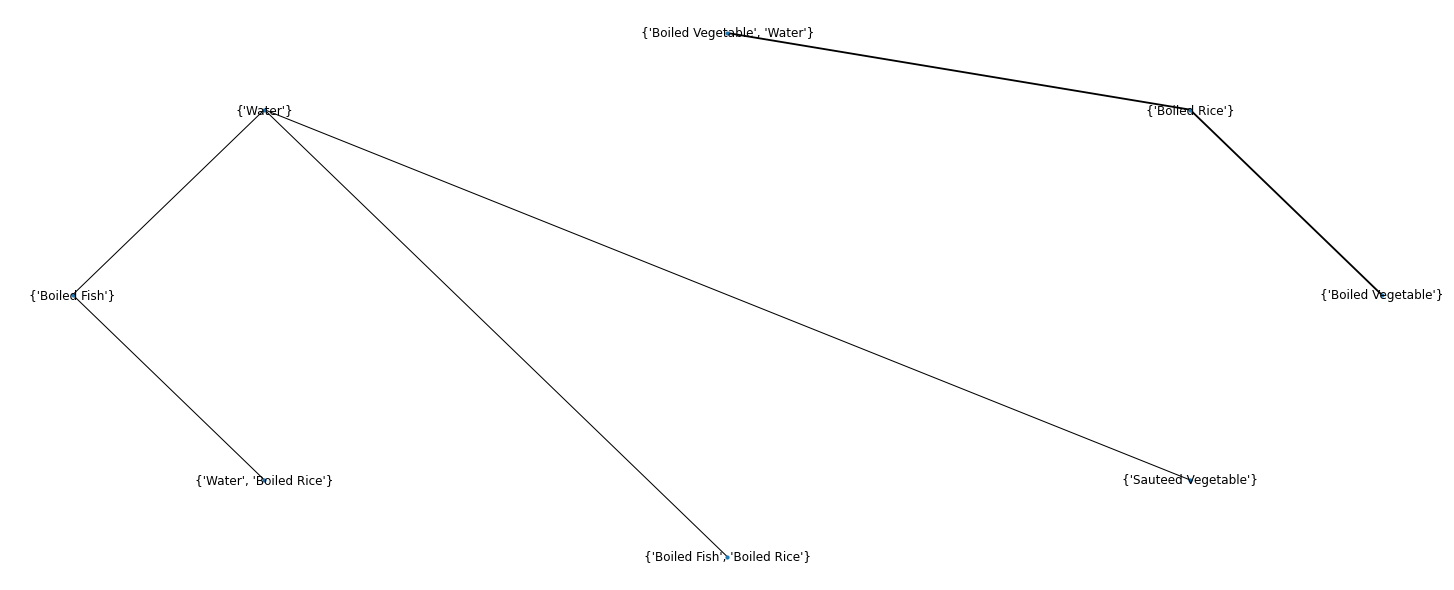

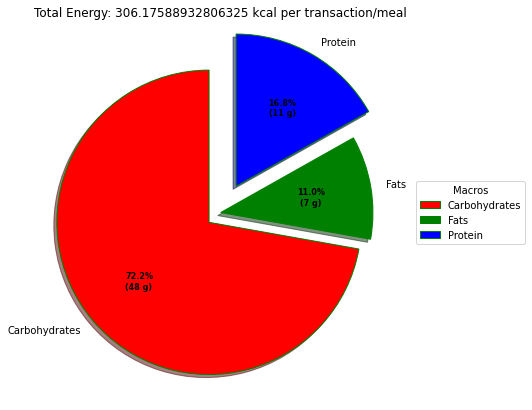

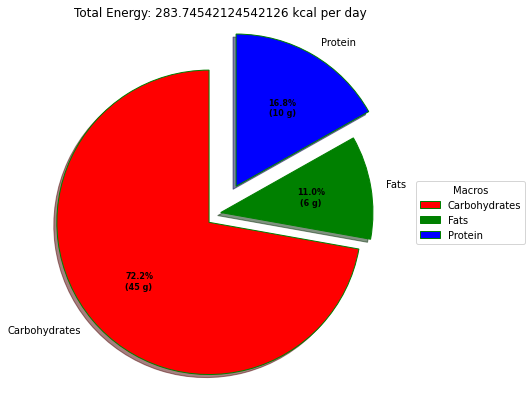

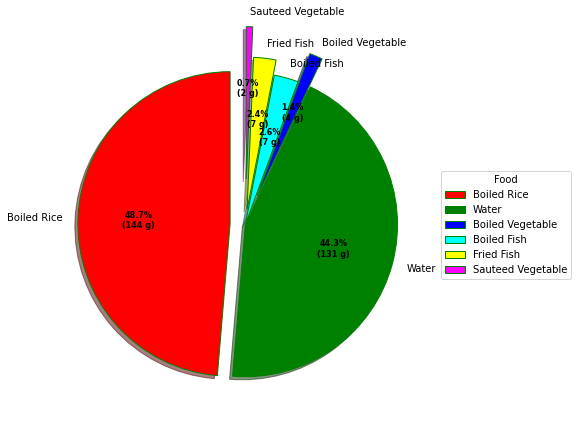

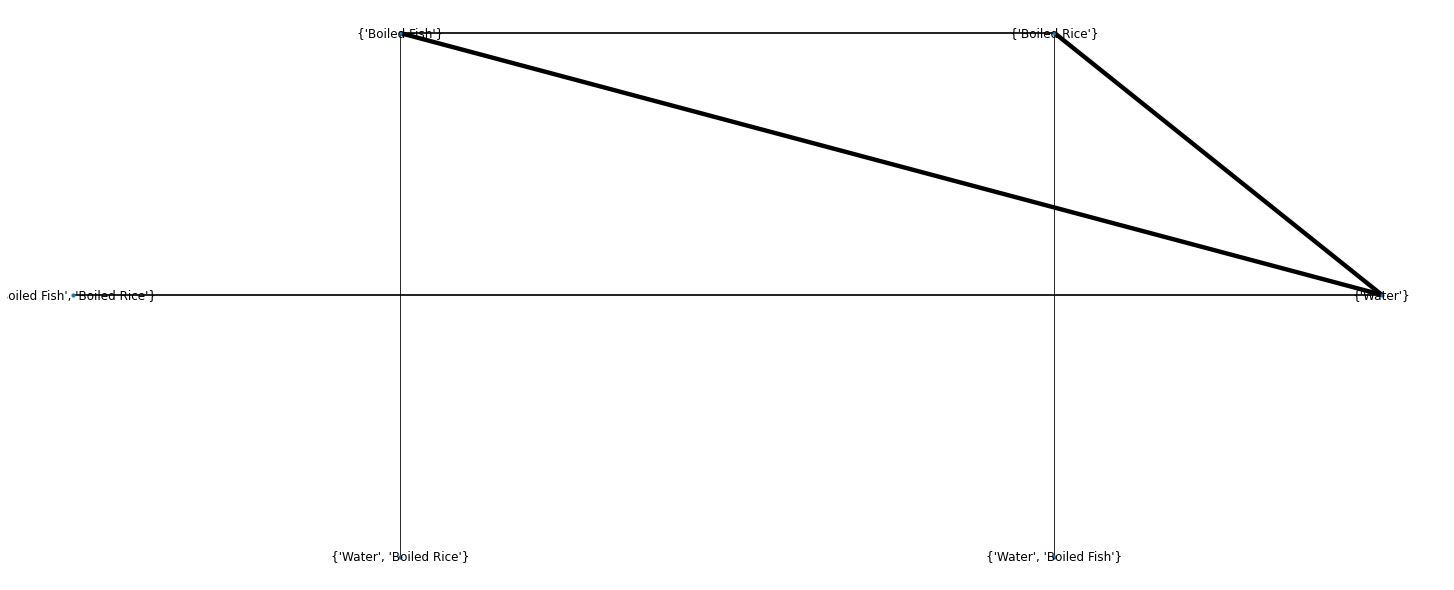

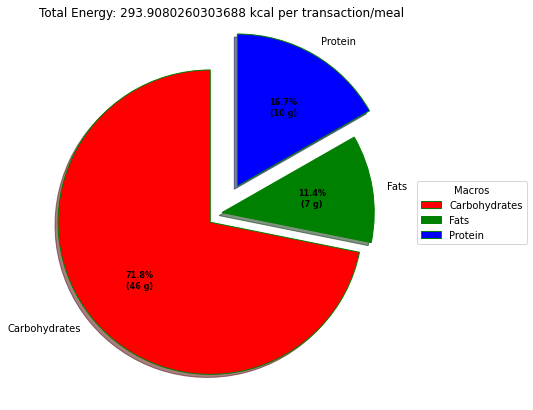

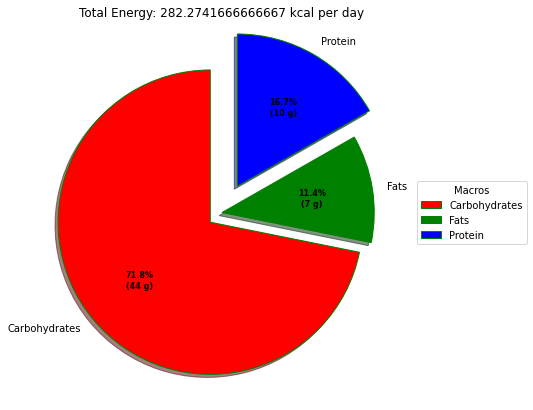

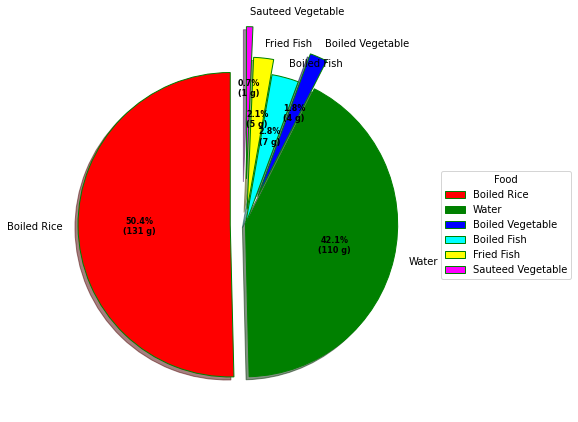

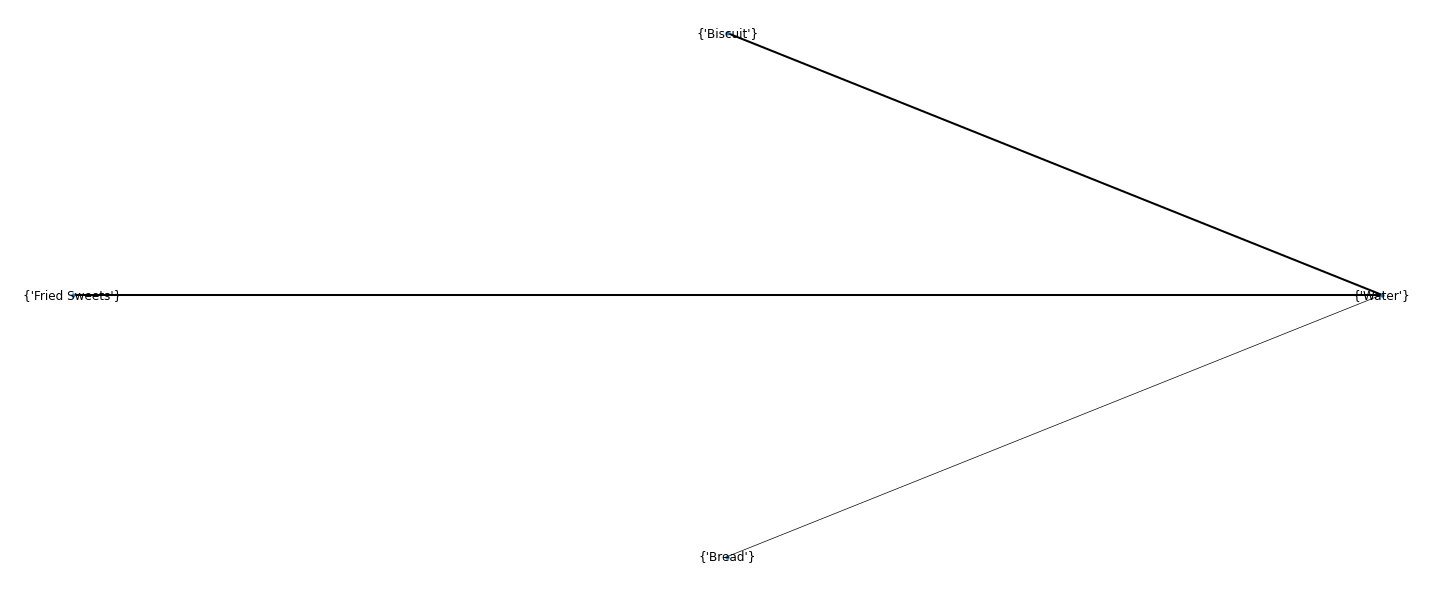

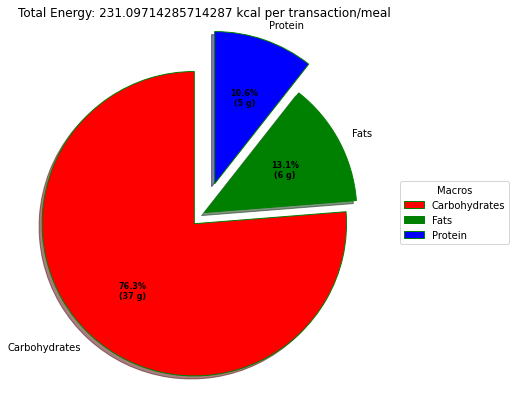

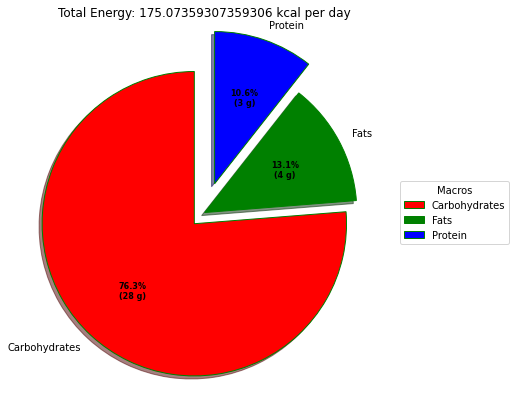

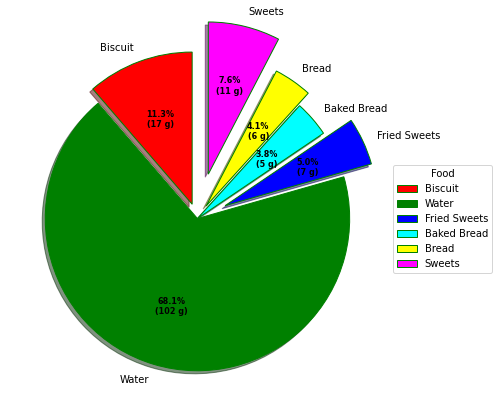

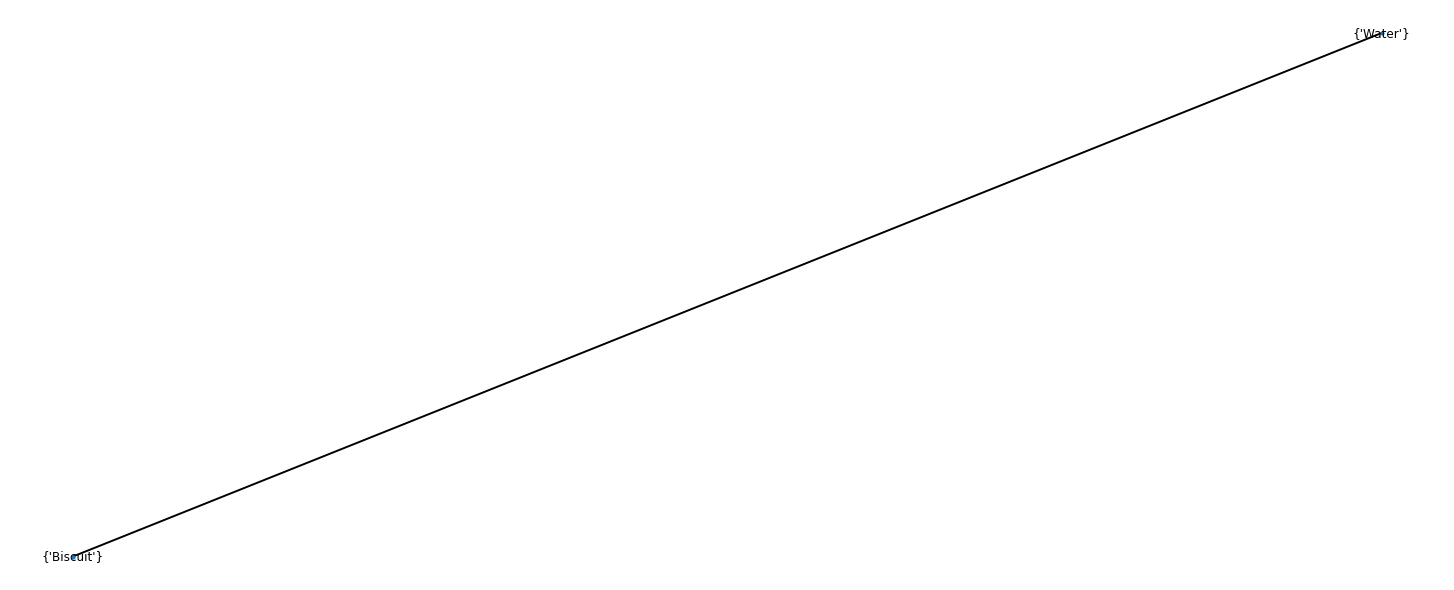

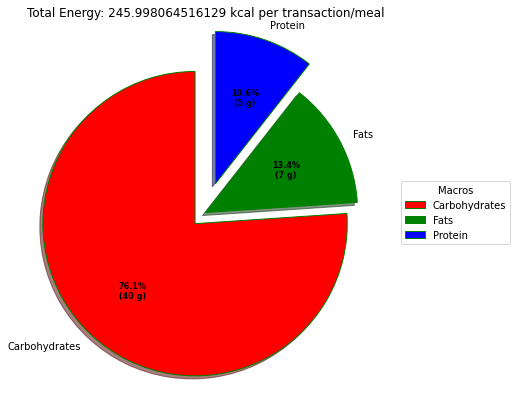

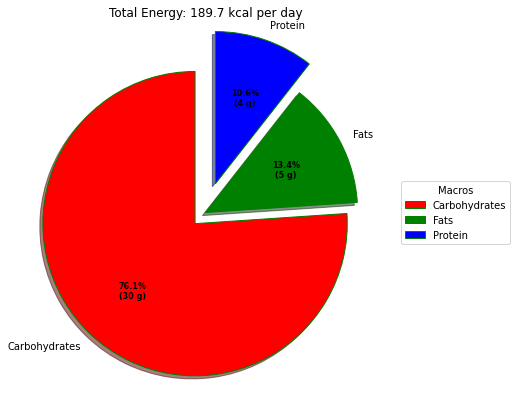

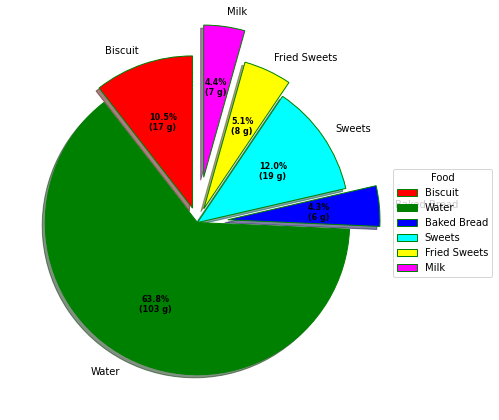

In [25]:
# Sex
sexes = ['Male', 'Female']
for name in names: 
    for meal in meals: 
        for s in sexes:
            f(name=name, meal=meal, sex=s)

In [ ]:
for name in names:
    for meal in meals:
        f(name=name, meal=meal) 

In [ ]:
#4Ps

for name in names:
    for meal in meals:
        f(name=name, meal=meal, BEN_4PS = ['Yes'])     
for name in names:
    for meal in meals:
        f(name=name, meal=meal, BEN_4PS = ['No'])

In [ ]:
# Total Expense Weekly

metrics_per_hhd_comval['TOTAL_EXPENSE_WEEKLY'].mean()

for name in names:
    for meal in meals:
        f(name=name, meal=meal, TOTAL_EXPENSE_WEEKLY = metrics_per_hhd_comval['TOTAL_EXPENSE_WEEKLY'].mean(), cumu_down=True)     
for name in names:
    for meal in meals:
        f(name=name, meal=meal, TOTAL_EXPENSE_WEEKLY = metrics_per_hhd_comval['TOTAL_EXPENSE_WEEKLY'].mean(), cumu_up=True)


In [ ]:
# Food expense weekly

metrics_per_hhd_comval['FOOD_EXPENSE_WEEKLY'].mean()

for name in names:
    for meal in meals:
        f(name=name, meal=meal, FOOD_EXPENSE_WEEKLY = metrics_per_hhd_comval['FOOD_EXPENSE_WEEKLY'].mean(), cumu_down=True)     
for name in names:
    for meal in meals:
        f(name=name, meal=meal, FOOD_EXPENSE_WEEKLY = metrics_per_hhd_comval['FOOD_EXPENSE_WEEKLY'].mean(), cumu_up=True)

In [ ]:
# Food Insecurity
food_s_vals = list(metrics_per_hhd_val["FOOD_INSECURITY"].unique())
food_s_vals = food_s_vals[0:4]


for name in names: 
    for meal in meals: 
        for s in food_s_vals:
            f(name=name, meal=meal, FOOD_INSECURITY = [s])

In [ ]:
# Feeding Program onwards

cols = metrics_per_hhd_comval.columns[metrics_per_hhd_comval.columns.get_loc('HHDD_'):metrics_per_hhd_comval.columns.get_loc('_Undernutrition Score')+1].tolist()
cols = cols + ['Feeding Program']
for name in names: 
    for meal in meals:
        for col in cols:
            for i in range(2):
                mapping = {col:[str(i)]}
                f(name=name, meal=meal, **mapping)